In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Plotting helper function
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

### Data Preparation

In [6]:
import csv
time_step = []
sunspots = []

with open('./data/Sunspots.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        sunspots.append(float(row[2]))
        time_step.append(int(row[0]))

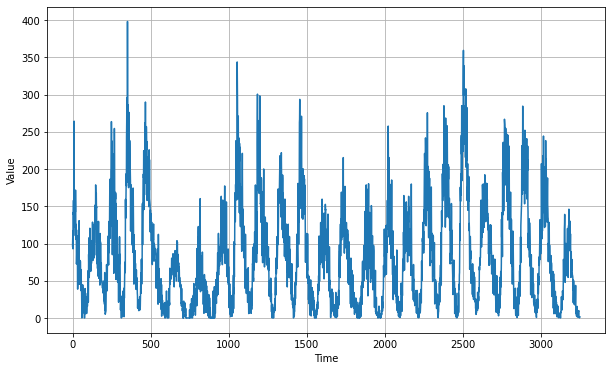

In [7]:
series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))

# Invokes the plot series function
plot_series(time, series)

In [9]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [10]:
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [11]:
# Window dataset function
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [12]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(3000,)
Epoch 1/100
12/12 [==============================] - 7s 604ms/step - loss: 79.3289 - mae: 79.6432
Epoch 2/100
12/12 [==============================] - 4s 356ms/step - loss: 77.6025 - mae: 77.9456
Epoch 3/100
12/12 [==============================] - 4s 345ms/step - loss: 75.0294 - mae: 75.3777
Epoch 4/100
12/12 [==============================] - 4s 342ms/step - loss: 71.9486 - mae: 72.2988
Epoch 5/100
12/12 [==============================] - 4s 336ms/step - loss: 68.5473 - mae: 68.8979
Epoch 6/100
12/12 [==============================] - 4s 341ms/step - loss: 64.9847 - mae: 65.3328
Epoch 7/100
12/12 [==============================] - 4s 346ms/step - loss: 61.4695 - mae: 61.8105
Epoch 8/100
12/12 [==============================] - 4s 339ms/step - loss: 58.1538 - mae: 58.4827
Epoch 9/100
12/12 [==============================] - 4s 354ms/step - loss: 55.1324 - mae: 55.4492
Epoch 10/100
12/

In [17]:
window_size = 64
batch_size = 256

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

### Model Architecture & Fitting

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          192       
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1950      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

In [19]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [20]:
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12/12 [==============================] - 2s 173ms/step - loss: 80.4035 - mae: 80.9008 - lr: 1.0000e-08
Epoch 2/100
12/12 [==============================] - 2s 167ms/step - loss: 78.6801 - mae: 79.1776 - lr: 1.1220e-08
Epoch 3/100
12/12 [==============================] - 2s 167ms/step - loss: 76.0882 - mae: 76.5858 - lr: 1.2589e-08
Epoch 4/100
12/12 [========================

Epoch 64/100
12/12 [==============================] - 3s 212ms/step - loss: 19.4610 - mae: 19.9534 - lr: 1.4125e-05
Epoch 65/100
12/12 [==============================] - 2s 208ms/step - loss: 19.3517 - mae: 19.8439 - lr: 1.5849e-05
Epoch 66/100
12/12 [==============================] - 3s 214ms/step - loss: 19.6723 - mae: 20.1648 - lr: 1.7783e-05
Epoch 67/100
12/12 [==============================] - 3s 211ms/step - loss: 19.8928 - mae: 20.3861 - lr: 1.9953e-05
Epoch 68/100
12/12 [==============================] - 3s 209ms/step - loss: 19.4929 - mae: 19.9855 - lr: 2.2387e-05
Epoch 69/100
12/12 [==============================] - 3s 228ms/step - loss: 18.5798 - mae: 19.0723 - lr: 2.5119e-05
Epoch 70/100
12/12 [==============================] - 3s 226ms/step - loss: 19.7736 - mae: 20.2665 - lr: 2.8184e-05
Epoch 71/100
12/12 [==============================] - 3s 251ms/step - loss: 19.9152 - mae: 20.4082 - lr: 3.1623e-05
Epoch 72/100
12/12 [==============================] - 3s 226ms/step - lo

(1e-08, 0.0001, 0.0, 60.0)

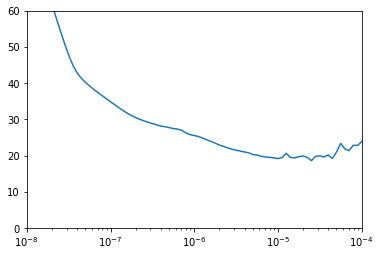

In [21]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [22]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1830      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

In [24]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [25]:
history = model.fit(train_set,epochs=500)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/30 [==============================] - 3s 92ms/step - loss: 38.9182 - mae: 39.4146
Epoch 2/500
30/30 [==============================] - 3s 86ms/step - loss: 25.7631 - mae: 26.2575
Epoch 3/500
30/30 [==============================] - 3s 101ms/step - loss: 22.0827 - mae: 22.5764
Epoch 4/500
30/30 [==============================] - 3s 85ms/step - loss: 20.4713 - mae: 20.9643

30/30 [==============================] - 2s 79ms/step - loss: 16.4996 - mae: 16.9885
Epoch 76/500
30/30 [==============================] - 2s 80ms/step - loss: 16.4518 - mae: 16.9406
Epoch 77/500
30/30 [==============================] - 2s 80ms/step - loss: 16.4243 - mae: 16.9131
Epoch 78/500
30/30 [==============================] - 2s 82ms/step - loss: 16.5422 - mae: 17.0312
Epoch 79/500
30/30 [==============================] - 3s 85ms/step - loss: 16.5007 - mae: 16.9897
Epoch 80/500
30/30 [==============================] - 3s 90ms/step - loss: 16.6183 - mae: 17.1073
Epoch 81/500
30/30 [==============================] - 2s 81ms/step - loss: 16.6010 - mae: 17.0899
Epoch 82/500
30/30 [==============================] - 3s 85ms/step - loss: 16.3922 - mae: 16.8803
Epoch 83/500
30/30 [==============================] - 3s 85ms/step - loss: 16.3414 - mae: 16.8298
Epoch 84/500
30/30 [==============================] - 3s 86ms/step - loss: 16.3604 - mae: 16.8487
Epoch 85/500
30/30 [=============

30/30 [==============================] - 2s 74ms/step - loss: 15.9301 - mae: 16.4184
Epoch 159/500
30/30 [==============================] - 2s 74ms/step - loss: 15.9925 - mae: 16.4817
Epoch 160/500
30/30 [==============================] - 2s 74ms/step - loss: 15.9478 - mae: 16.4365
Epoch 161/500
30/30 [==============================] - 2s 74ms/step - loss: 15.9064 - mae: 16.3950
Epoch 162/500
30/30 [==============================] - 2s 76ms/step - loss: 16.0163 - mae: 16.5052
Epoch 163/500
30/30 [==============================] - 2s 74ms/step - loss: 15.9580 - mae: 16.4467
Epoch 164/500
30/30 [==============================] - 2s 74ms/step - loss: 15.9027 - mae: 16.3913
Epoch 165/500
30/30 [==============================] - 2s 73ms/step - loss: 15.9019 - mae: 16.3905
Epoch 166/500
30/30 [==============================] - 2s 74ms/step - loss: 15.8859 - mae: 16.3745
Epoch 167/500
30/30 [==============================] - 2s 75ms/step - loss: 15.9351 - mae: 16.4238
Epoch 168/500
30/30 [===

30/30 [==============================] - 2s 75ms/step - loss: 15.5526 - mae: 16.0403
Epoch 241/500
30/30 [==============================] - 2s 75ms/step - loss: 15.6818 - mae: 16.1702
Epoch 242/500
30/30 [==============================] - 2s 75ms/step - loss: 15.6496 - mae: 16.1377
Epoch 243/500
30/30 [==============================] - 2s 75ms/step - loss: 15.5930 - mae: 16.0807
Epoch 244/500
30/30 [==============================] - 2s 74ms/step - loss: 15.5454 - mae: 16.0331
Epoch 245/500
30/30 [==============================] - 2s 75ms/step - loss: 15.5748 - mae: 16.0624
Epoch 246/500
30/30 [==============================] - 2s 75ms/step - loss: 15.5087 - mae: 15.9962
Epoch 247/500
30/30 [==============================] - 2s 76ms/step - loss: 15.5047 - mae: 15.9924
Epoch 248/500
30/30 [==============================] - 2s 74ms/step - loss: 15.6764 - mae: 16.1646
Epoch 249/500
30/30 [==============================] - 2s 75ms/step - loss: 15.6346 - mae: 16.1227
Epoch 250/500
30/30 [===

30/30 [==============================] - 2s 78ms/step - loss: 15.4944 - mae: 15.9823
Epoch 323/500
30/30 [==============================] - 2s 73ms/step - loss: 15.2167 - mae: 15.7040
Epoch 324/500
30/30 [==============================] - 2s 82ms/step - loss: 15.2401 - mae: 15.7267
Epoch 325/500
30/30 [==============================] - 2s 82ms/step - loss: 15.1361 - mae: 15.6229
Epoch 326/500
30/30 [==============================] - 2s 75ms/step - loss: 15.1411 - mae: 15.6277
Epoch 327/500
30/30 [==============================] - 2s 75ms/step - loss: 15.2589 - mae: 15.7458
Epoch 328/500
30/30 [==============================] - 2s 75ms/step - loss: 15.3063 - mae: 15.7937
Epoch 329/500
30/30 [==============================] - 2s 75ms/step - loss: 15.1005 - mae: 15.5867
Epoch 330/500
30/30 [==============================] - 2s 75ms/step - loss: 15.2437 - mae: 15.7306
Epoch 331/500
30/30 [==============================] - 2s 76ms/step - loss: 15.1165 - mae: 15.6030
Epoch 332/500
30/30 [===

30/30 [==============================] - 2s 75ms/step - loss: 14.9980 - mae: 15.4843
Epoch 405/500
30/30 [==============================] - 2s 75ms/step - loss: 14.8414 - mae: 15.3278
Epoch 406/500
30/30 [==============================] - 2s 75ms/step - loss: 14.8835 - mae: 15.3695
Epoch 407/500
30/30 [==============================] - 2s 75ms/step - loss: 14.7805 - mae: 15.2662
Epoch 408/500
30/30 [==============================] - 2s 76ms/step - loss: 14.7607 - mae: 15.2466
Epoch 409/500
30/30 [==============================] - 2s 77ms/step - loss: 14.7563 - mae: 15.2418
Epoch 410/500
30/30 [==============================] - 2s 78ms/step - loss: 15.1074 - mae: 15.5946
Epoch 411/500
30/30 [==============================] - 2s 76ms/step - loss: 14.7463 - mae: 15.2322
Epoch 412/500
30/30 [==============================] - 2s 77ms/step - loss: 14.8427 - mae: 15.3291
Epoch 413/500
30/30 [==============================] - 2s 78ms/step - loss: 14.7950 - mae: 15.2813
Epoch 414/500
30/30 [===

30/30 [==============================] - 5s 161ms/step - loss: 14.5694 - mae: 15.0551
Epoch 487/500
30/30 [==============================] - 2s 75ms/step - loss: 14.6181 - mae: 15.1041
Epoch 488/500
30/30 [==============================] - 4s 146ms/step - loss: 14.5128 - mae: 14.9981
Epoch 489/500
30/30 [==============================] - 3s 105ms/step - loss: 14.5763 - mae: 15.0622
Epoch 490/500
30/30 [==============================] - 2s 74ms/step - loss: 14.5165 - mae: 15.0018
Epoch 491/500
30/30 [==============================] - 5s 161ms/step - loss: 14.4341 - mae: 14.9195
Epoch 492/500
30/30 [==============================] - 4s 150ms/step - loss: 14.4852 - mae: 14.9706
Epoch 493/500
30/30 [==============================] - 2s 81ms/step - loss: 14.5396 - mae: 15.0251
Epoch 494/500
30/30 [==============================] - 2s 77ms/step - loss: 14.4249 - mae: 14.9106
Epoch 495/500
30/30 [==============================] - 2s 75ms/step - loss: 14.6156 - mae: 15.1019
Epoch 496/500
30/30

### Model Evaluation

In [26]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 

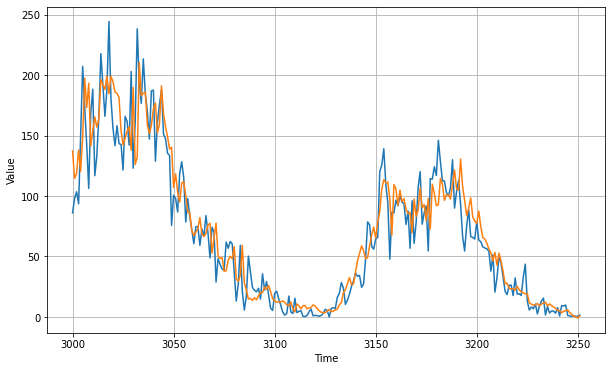

In [27]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [28]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

14.629054

In [29]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

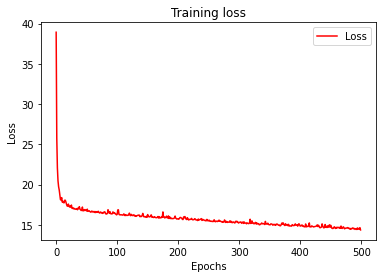

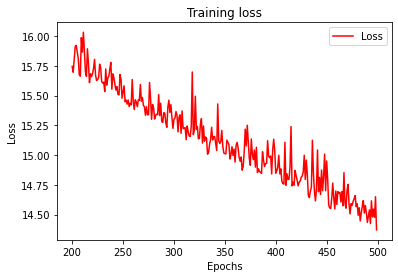

<Figure size 432x288 with 0 Axes>

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()